# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [72]:
chipo=pd.read_csv("C:/doit/chipotle.txt",sep="\t")
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:]))
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### Step 4. See the first 10 entries

In [73]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


### Step 5. Create a histogram of the top 5 items bought

<AxesSubplot:xlabel='item_name'>

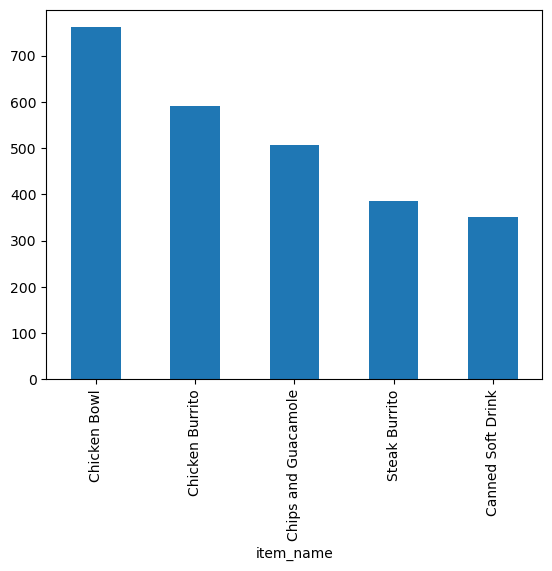

In [74]:
top5 = chipo.groupby('item_name').quantity.sum().sort_values(ascending = False)[0:5]
top5.plot(kind="bar")

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [75]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [76]:
orders = chipo.groupby('order_id').sum()
orders

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


Text(0.5, 1.0, 'The Number of Items Orderered Per Order Price')

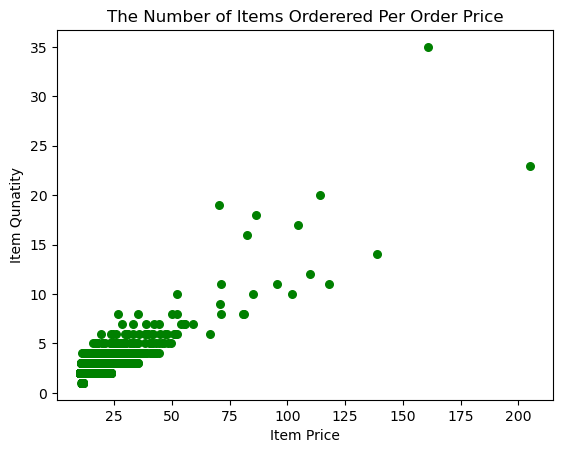

In [77]:
fig=plt.figure()
axes2=fig.add_subplot(1,1,1)
axes2.scatter(x = orders.item_price, y = orders.quantity, s = 30, c = 'green')
axes2.set_xlabel("Item Price")
axes2.set_ylabel("Item Qunatity")
axes2.set_title("The Number of Items Orderered Per Order Price")

### Step 7. BONUS: Create a question and a graph to answer your own question.

### Draw a regplot with total item quantity per item price

In [26]:
import seaborn as sns

In [174]:
df2=pd.DataFrame(chipo.groupby('item_name').quantity.sum())
df3=pd.DataFrame(chipo.groupby('item_name').item_price.sum()/df2.quantity)

In [176]:
df4=pd.concat([df2,df3],axis=1)
df4.rename(columns={0:'item_price'},inplace=True)
df4.sort_values(by="item_price",inplace=True)
df4

,quantity,item_price
item_name,,
Canned Soda,126,1.090000
Canned Soft Drink,351,1.250000
Bottled Water,211,1.433934
Side of Chips,110,1.690000
Chips,230,2.149304
Chips and Tomatillo-Red Chili Salsa,25,2.390000
Chips and Tomatillo-Green Chili Salsa,33,2.390000
Chips and Roasted Chili-Corn Salsa,18,2.390000
Chips and Fresh Tomato Salsa,130,2.779692


Text(0.5, 1.0, 'Total Item Quantity per Item Price')

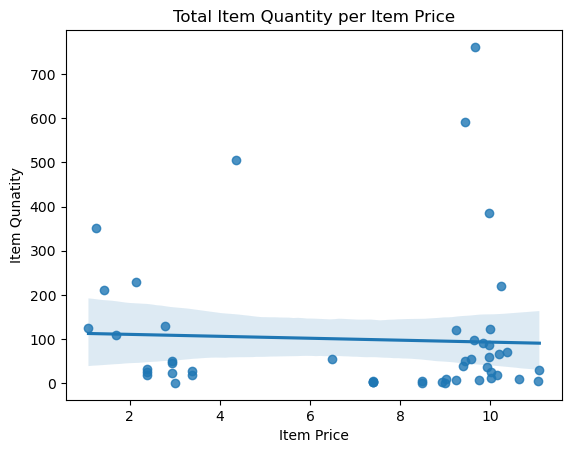

In [177]:
ax=plt.subplots()
ax=sns.regplot(x='item_price',y='quantity',data=df4,fit_reg=True)
ax.set_xlabel("Item Price")
ax.set_ylabel("Item Qunatity")
ax.set_title("Total Item Quantity per Item Price")